In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import product

sys.path.extend([
                '../src',
                '../data',
                ])

from utils import run_nested_cv_3a

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-09 11:33:54.239839: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'adam'} with score: 0.226
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_absolute_error at 0x307a83820>, 'optimizer': 'adam'} with score: 0.305
New best HP found: {'activation': 'relu', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optim

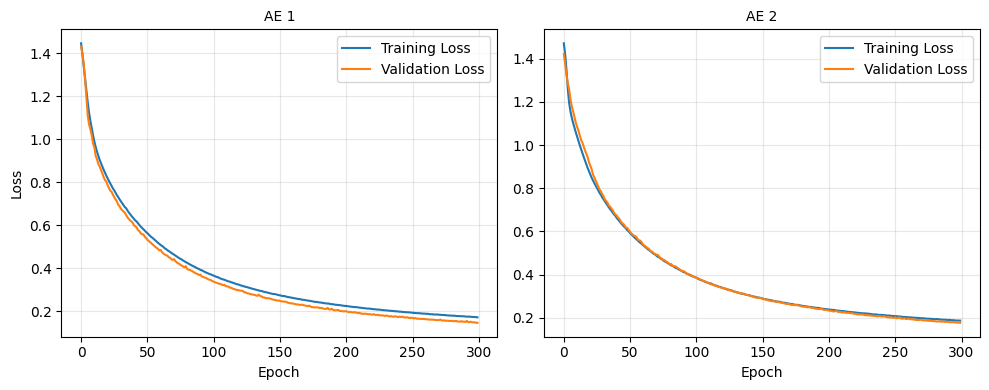

Limb: 3 Subject: 11 Youden Index: 0.14930784442979572 Sensitivity: 0.24390243902439024 Specificity: 0.9054054054054054
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'adam'} with score: 0.358
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_absolute_error at 0x307a83820>, 'optimizer': 'adam'} with score: 0.524


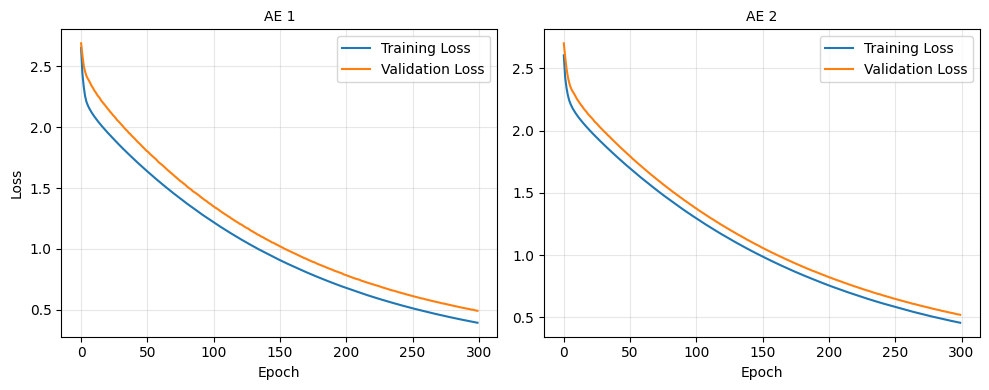

Limb: 3 Subject: 12 Youden Index: 0.09745873040670716 Sensitivity: 0.8497109826589595 Specificity: 0.24774774774774774
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'adam'} with score: 0.200
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.GlorotNormal object at 0x31b37e5e0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'adam'} with score: 0.225
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers

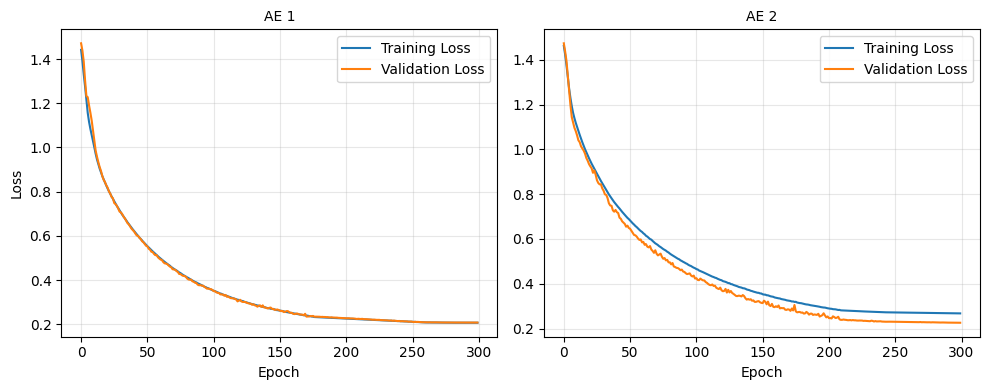

Limb: 3 Subject: 13 Youden Index: 0.2397464096260835 Sensitivity: 0.9007633587786259 Specificity: 0.3389830508474576
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'adam'} with score: 0.172
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'nadam'} with score: 0.185
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.H

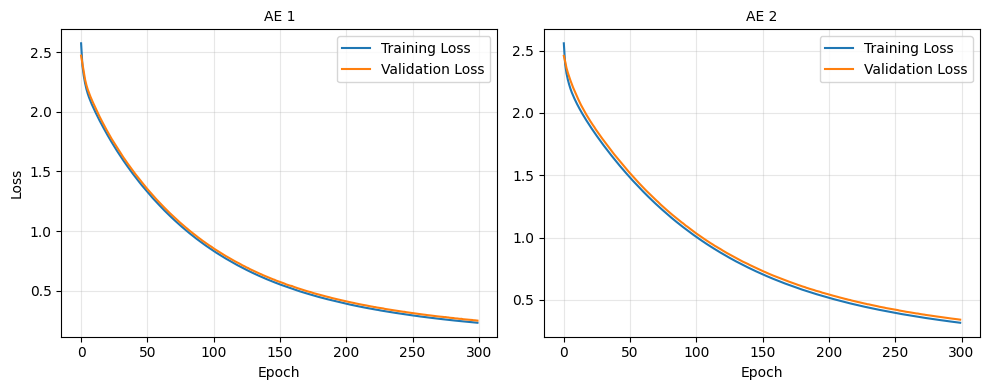

Limb: 3 Subject: 14 Youden Index: 0.4570273003033367 Sensitivity: 0.782608695652174 Specificity: 0.6744186046511628
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'adam'} with score: 0.089
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x31b37e4c0>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x307a83550>, 'optimizer': 'nadam'} with score: 0.100
New best HP found: {'activation': 'tanh', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x31b37e6a0>, 'kernel_init': <keras.initializers.initializers_v2.He

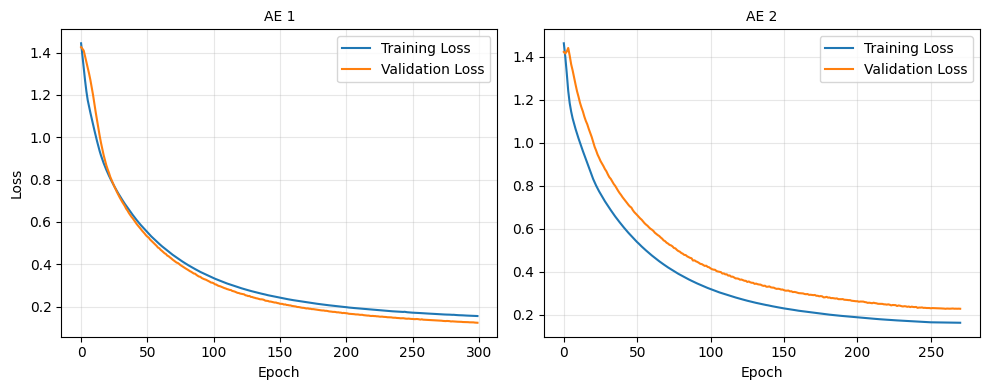

Limb: 3 Subject: 15 Youden Index: 0.45145631067961167 Sensitivity: 0.5 Specificity: 0.9514563106796117
0.27899931908910697 0.15016859251083955


In [2]:


approach = 3
filename = f'../results/approach3a/limb_nested_cv_affected.csv'

window_size = 100
epochs = 300
batch_size = 32
class_loss = False
plot_hist = True

error_func = None

X = affected[['ax', 'ay', 'az']]
y = affected['gnd']
subjects = affected['subject']
limbs = affected['limb']

hp = {
        'activation': ['tanh', 'relu'],
        'kernel_init': [tf.keras.initializers.HeNormal(seed=42), 
                        tf.keras.initializers.GlorotNormal(seed=42), ],
        'bias_init': [tf.keras.initializers.Zeros()],
        'optimizer':['adam', 'nadam'],
        'loss': [tf.keras.losses.mean_squared_error,
                 tf.keras.losses.mean_absolute_error],
        'learning_rate': [0.0001],
        'batch_norm': [False, True]
    }

if not os.path.exists('../results'):
    os.makedirs('../results/approach3')

results_3a = run_nested_cv_3a(
    window_size,             
    X=X,                         
    y=y,                        
    subjects=subjects,           
    limbs=limbs,                     
    architecture=architecture,   
    hp_grid=hp,
    epochs=epochs,                  
    batch_size=batch_size,              
    class_loss=False,           
    plot_hist=True,            
    error_func='None'
)

print(np.mean(results_3a['youden_index']), np.std(results_3a['youden_index']))